## Loading the dataset

In [5]:
import pandas as pd
df=pd.read_csv('C:\\Users\\monis\\Downloads\\Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Visualization

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

## Univariate Analysis

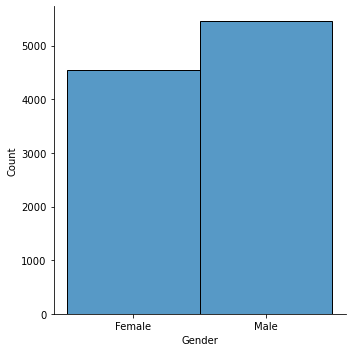

In [7]:
sns.displot(df.Gender)   

## Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='HasCrCard'>

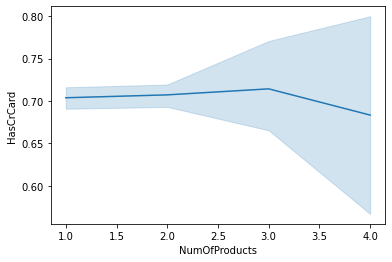

In [11]:
sns.lineplot(df.NumOfProducts,df.HasCrCard)   

## Multivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, size. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='HasCrCard'>

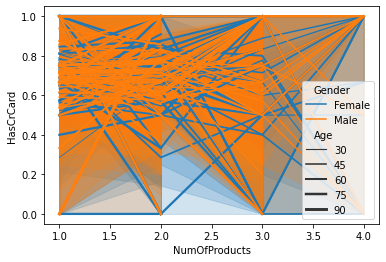

In [15]:
sns.lineplot(df.NumOfProducts,df.HasCrCard,df.Gender,df.Age)

## Desceiptive Statistics

In [16]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Handle Missing Values

In [17]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## Outliers Detection

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

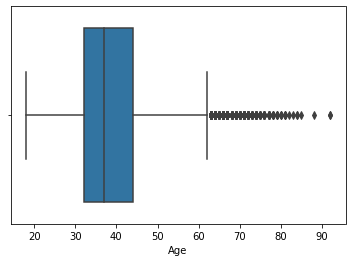

In [19]:
sns.boxplot(df.Age)

## Replacing Outliers

In [54]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)

In [55]:
IQR =q3-q1

In [56]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [33]:
upper_limit

61.0

In [34]:
import numpy as np

In [35]:
df.median()

C:\Users\monis\AppData\Local\Temp\ipykernel_10728\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [51]:
df['Age']=np.where(df['Age']>upper_limit,3.7,df['Age'])

C:\Users\monis\AppData\Local\Temp\ipykernel_10728\3908778961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=np.where(df['Age']>upper_limit,3.7,df['Age'])


<AxesSubplot:xlabel='Age'>

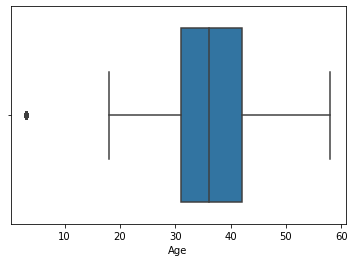

In [52]:
sns.boxplot(df.Age)

In [57]:
df=df[df.Age<upper_limit]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

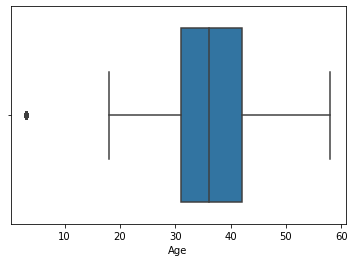

In [58]:
sns.boxplot(df.Age)

## Find Categorical column & perform Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le=LabelEncoder()

In [61]:
df.Surname=le.fit_transform(df.Surname)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1108,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1169,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2026,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,287,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1809,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


## Split into Dependent & Independent Variables

In [63]:
y=df['Surname']
y                              #dependent variable

0       1108
1       1169
2       2026
3        287
4       1809
        ... 
9995    1985
9996    1328
9997    1560
9998    2330
9999    2731
Name: Surname, Length: 9823, dtype: int32

In [66]:
X=df.drop(columns=['Surname'],axis=1)
X.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [77]:
y=df['Geography']
y                              #dependent variable

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 9823, dtype: object

In [85]:
X=df.drop(columns=['Geography','Gender'],axis=1)
X.head()                                          #independent variable

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1108,619,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1169,608,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2026,502,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,287,699,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1809,850,43.0,2,125510.82,1,1,1,79084.10,0


## Scaling

In [86]:
from sklearn.preprocessing import scale
X

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1108,619,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1169,608,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2026,502,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,287,699,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1809,850,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1985,771,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1328,516,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1560,709,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2330,772,42.0,3,75075.31,2,1,0,92888.52,1


In [88]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731171,-0.780496,-0.460905,-0.328069,0.588178,-1.042460,-1.224763,-0.915809,0.646903,0.975362,0.021417,2.006770
1,-1.730825,-0.603928,-0.388371,-0.442026,0.493179,-1.388117,0.118318,-0.915809,-1.545826,0.975362,0.216145,-0.498313
2,-1.730478,-0.993033,0.630673,-1.540154,0.588178,1.031481,1.333917,2.527632,0.646903,-1.025260,0.240308,2.006770
3,-1.730132,0.146900,-1.437141,0.500707,0.303180,-1.388117,-1.224763,0.805912,-1.545826,-1.025260,-0.109443,-0.498313
4,-1.729786,0.654472,0.372642,2.065022,0.683178,-1.042460,0.786638,-0.915809,0.646903,0.975362,-0.365908,-0.498313


## Split the data into Train & Test

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [91]:
x_train.shape

(7858, 12)

In [92]:
x_test.shape

(1965, 12)